In [1]:
#finding the Impact of promotions on sales and customer data.

In [2]:
#Importing python libraries
import pandas as pd

In [3]:
#Importing my dataset
train = pd.read_csv(r'c:\Users\Udeme Umana\Downloads\train.csv',low_memory=False)

In [4]:
#Viewing the first five rows of my dataset
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
#viewing the datatypes of each column
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [6]:
#converting the date column to a datetime
train['Date'] = train['Date'].astype('Datetime64')

In [7]:
#Checking if the date column has been converted to a datetime
train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [8]:
#extracting the year from the date column
train['Year'] = train['Date'].dt.year
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,2015


In [9]:
#Finding the unique values from the promo column
train['Promo'].unique()

array([1, 0], dtype=int64)

In [10]:
#Finding the total number of sales and customers
train['Total_sales_customer'] = train['Sales'] + train['Customers']
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Total_sales_customer
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,5818
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,6689
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,9135
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,15493
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,5381


In [11]:
#finding out the sum of each column when promo column  = 1 and open column = 1
train[(train['Promo'] == 0) &(train['Open']==1)].sum()


C:\Users\Udeme Umana\AppData\Local\Temp\ipykernel_11192\2868263754.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[(train['Promo'] == 0) &(train['Open']==1)].sum()


Store                                                           261062116
DayOfWeek                                                         1855048
Sales                                                          2771974337
Customers                                                       325777807
Open                                                               467496
Promo                                                                   0
StateHoliday            0000000000000000000000000000000000000000000000...
SchoolHoliday                                                       85694
Year                                                            941450547
Total_sales_customer                                           3097752144
dtype: object

In [12]:
#finding out the sum of each column when promo column  = 0 and open column = 1
train[(train['Promo'] == 1) &(train['Open']==1)].sum()

C:\Users\Udeme Umana\AppData\Local\Temp\ipykernel_11192\1565326784.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[(train['Promo'] == 1) &(train['Open']==1)].sum()


Store                                                           210465730
DayOfWeek                                                         1117517
Sales                                                          3101206286
Customers                                                       318263948
Open                                                               376896
Promo                                                              376896
StateHoliday            0000000000000000000000000000000000000000000000...
SchoolHoliday                                                       77763
Year                                                            759013030
Total_sales_customer                                           3419470234
dtype: object

In [13]:
#

# Data Pivoting and Visualization

In [14]:
#Creating a pivot table to see the total number of sales and customers for each year when promo =1
promo_1 =(train[(train['Promo'] == 1) &(train['Open']==1)]).pivot_table(index='Year',values=['Sales','Customers'],aggfunc='sum')

In [15]:
promo_1

,Customers,Sales
Year,,
2013,123500491,1185236901
2014,119254896,1157208136
2015,75508561,758761249


<AxesSubplot:xlabel='Year'>

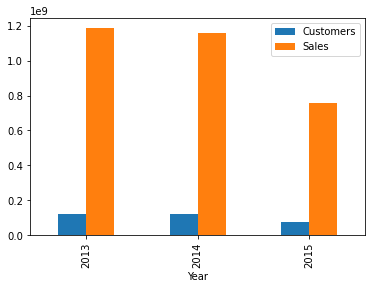

In [22]:
#Visualizing promo_1
promo_1.plot(kind='bar',linewidth=2.0)

In [23]:
#Creating a pivot table to see the total number of sales and customers for each year when promo =0
promo_0 =(train[(train['Promo'] == 0) &(train['Open']==1)]).pivot_table(index='Year',values=['Sales','Customers'],aggfunc='sum')

In [21]:
promo_0

,Total_sales_customer
Year,
2013,1250143117
2014,1144830835
2015,702778192


<AxesSubplot:xlabel='Year'>

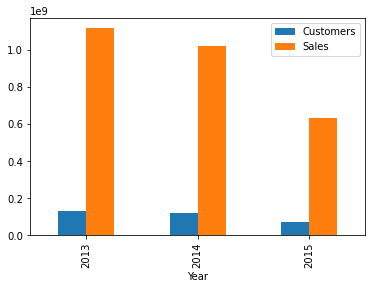

In [25]:
#Visualizing promo_0
promo_0.plot(kind='bar',linewidth=2.5)

In [ ]:
#from line 11 and 12, it shows that promo had an impact on the number of sales but not on the number of customers